In [1]:
import zipfile
import os
# download files from GitHub as zip
!wget https: // github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip


local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.')  # extract all data into current working directory
zip_ref.close()

--2023-06-03 10:43:30--  ftp://https/
           => '.listing'
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-06-03 10:43:30--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2023-06-03 10:43:32--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.13

#  🚜 Predicting  Bulldozer Prices using Machine Learning


we are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

![](https://storage.googleapis.com/kaggle-competitions/kaggle/3316/media/bulldozer.jpg)


The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

Fast Iron is creating a "blue book for bull dozers," for customers to value what their heavy equipment fleet is worth at auction.



## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

`Train.csv` - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
`Valid.csv` - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
`Test.csv` - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

<!-- Sample submission files can be downloaded from the data page. Submission files should be formatted as follows: -->

Have a header: "SalesID,SalePrice"
Contain two columns
SalesID: SalesID for the validation set in sorted order
SalePrice: Your predicted price of the sale
```
Example lines of the submission format:
SalesID,SalePrice
1222837,36205
3044012,74570
1222841,31910.50
```

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets:


see in data file `Data Dictionary.xlsx`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [6]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

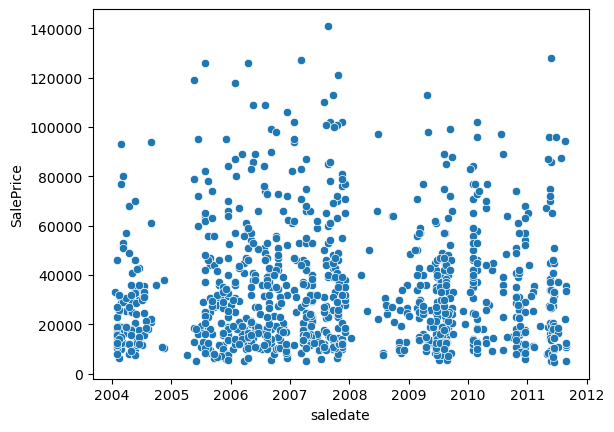

In [17]:

sns.scatterplot(x='saledate' ,y='SalePrice',data=df[:1000])

## lets make it order [Sort by saledate ]

when we are working with time series data, its a good idea to sort it by date



In [8]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

# Make a copy of the original DataFrame to perform edits on

we will make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [19]:
# make a copy of the original dataframe

df_tmp=df.copy()


# add datetime parameters for saledate column

df_tmp['saleYear']=df_tmp.saledate.dt.year
df_tmp['saleMonth']=df_tmp.saledate.dt.month
df_tmp['saleDay']=df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek']=df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear']=df_tmp.saledate.dt.dayofyear
# drop original saledate column

df_tmp.drop('saledate',axis=1,inplace=True)


In [20]:
df_tmp.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B,D6C,IT12,544,D5HII,12F,...,544H,317,S175,WA320,710VHP,D38E,2064,337G,12G,544H


# EDA
Let's take a look at datatypes of all the columns in our data.

In [26]:
# which state has the most sales

df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [17]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Now we want to convert all Non-numeric values into numeric values


In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [34]:
# Find the columns which contain strings

for column in df_tmp.columns:

    if pd.api.types.is_string_dtype(df[column]):
        print(column)
        df_tmp[column]=df_tmp[column].astype('category').cat.as_ordered()

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


KeyError: 'saleYear'

In [35]:
df_tmp.info() # now all strings are converted to categories

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [42]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [44]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save preprocessed data



In [3]:

# save preprocessed data
df_tmp.to_csv('data/bluebook-for-bulldozers/train_tmp.csv',index=False)


NameError: name 'df_tmp' is not defined

In [4]:
df_tmp=pd.read_csv('data/bluebook-for-bulldozers/train_tmp.csv',low_memory=False)

In [47]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## fill missing values

### fill the numeric missing values first

In [5]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)



SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [6]:

# check for which numeric columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing or not
            df_tmp[label+'_is_missing']=pd.isnull(content)
            # fill missing numeric values with median
            df_tmp[label]=content.fillna(content.median())




In [7]:
df_tmp.isnull().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [57]:
# check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Fill and turn categorical variables into numbers

In [8]:
# lets fill remaining categorical missing data and turn categories into numbers

for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # df_tmp[label]=content.fillna(content.median())
        print(label , content.isnull().sum())
        # add binary column to indicate whether sample had missing value
        df_tmp[label+'_is_missing']=pd.isnull(content)

        # turn categories into numbers and add +1
        df_tmp[label]=pd.Categorical(content).codes+1
        # +1 is added because pandas encodes missing categories as -1 and we dont want negative numbers




UsageBand 339028
fiModelDesc 0
fiBaseModel 0
fiSecondaryDesc 140727
fiModelSeries 354031
fiModelDescriptor 337882
ProductSize 216605
fiProductClassDesc 0
state 0
ProductGroup 0
ProductGroupDesc 0
Drive_System 305611
Enclosure 334
Forks 214983
Pad_Type 331602
Ride_Control 259970
Stick 331602
Transmission 224691
Turbocharged 331602
Blade_Extension 386715
Blade_Width 386715
Enclosure_Type 386715
Engine_Horsepower 386715
Hydraulics 82565
Pushblock 386715
Ripper 305753
Scarifier 386704
Tip_Control 386715
Tire_Size 315060
Coupler 192019
Coupler_System 367724
Grouser_Tracks 367823
Hydraulics_Flow 367823
Track_Type 310505
Undercarriage_Pad_Width 309782
Stick_Length 310437
Thumb 310366
Pattern_Changer 310437
Grouser_Type 310505
Backhoe_Mounting 331986
Blade_Type 330823
Travel_Controls 330821
Differential_Type 341134
Steering_Controls 341176


In [9]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


# Fit a machine learning model

#### Now that all of our data is numeric and our dataframe has no missing values, we should be able to build a machine learning model

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time
start_time=time.time()
# instantiate model
model=RandomForestRegressor(n_jobs=-1,random_state=42)

# n_jobs=-1 means use all available cores
# random_state=42 is used to make sure our results are reproducible


# split data into X and y
X=df_tmp.drop('SalePrice',axis=1) # X is all columns except SalePrice column [target]
y=df_tmp['SalePrice'] # y is SalePrice column [target]


# split data into train and validation sets

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# fit the model

model.fit(x_train,y_train)

end_time=time.time()


print(f'Training took {end_time-start_time} seconds')


# score the model

model.score(x_test,y_test)


Training took 95.53123211860657 seconds


0.906774783591115

In [21]:
# split data into train and validation sets

df_val=df_tmp[df_tmp.saleYear==2012]

df_train=df_tmp[df_tmp.saleYear!=2012]

In [22]:
# split data into X and y
%time
X_train,y_train=df_train.drop('SalePrice',axis=1),df_train['SalePrice']

X_valid,y_valid=df_val.drop('SalePrice',axis=1),df_val['SalePrice']

# instantiate model

model=RandomForestRegressor(n_jobs=-1,random_state=42)

# fit the model


model.fit(X_train,y_train)

# score the model

model.score(X_valid,y_valid)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.77 µs


## Building an evaluation function

In [13]:
# create evaluation function (the competition uses RMSLE)

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    '''
    Calculates root mean squared log error between predictions and true labels
    '''

    return np.sqrt(mean_squared_log_error(y_test,y_preds))


# create function to evaluate model on a few different levels

def show_scores(model):

    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)

    scores={'Training MAE':mean_absolute_error(y_train,train_preds),
            'Valid MAE':mean_absolute_error(y_valid,val_preds),
            'Training RMSLE':rmsle(y_train,train_preds),
            'Valid RMSLE':rmsle(y_valid,val_preds),
            'Training R^2':r2_score(y_train,train_preds),
            'Valid R^2':r2_score(y_valid,val_preds)}
    

    return scores


In [23]:
%%time
from sklearn.ensemble import RandomForestRegressor

## lets' try to reduce the max_samples value
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

# fit the model

model.fit(X_train,y_train)
# max_samples=10000 means use only 10000 samples to train the model instead of all samples

CPU times: user 26.1 s, sys: 719 ms, total: 26.9 s
Wall time: 7.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [24]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## hyperparameter tuning with RandomizedSearchCV

In [36]:
%%time
grid={
    'max_depth':[None,3,5,10],
    "max_samples":[10000],
    'n_estimators':np.arange(10,100,10),
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features':[0.5,1,'sqrt','auto'],
   
}

from sklearn.model_selection import RandomizedSearchCV

rs_model=RandomizedSearchCV(RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    
),
                            param_distributions=grid,

                            n_iter=100,
                            cv=5,
                            verbose=True)

# fit the randomized search model
rs_model.fit(X_train,y_train)

# find the best model hyperparameters
rs_model.best_params_

# evaluate the randomized search model

show_scores(rs_model)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 20min 10s, sys: 1min 2s, total: 21min 13s
Wall time: 30min 20s


{'Training MAE': 5817.475393620437,
 'Valid MAE': 7367.89227989316,
 'Training RMSLE': 0.2663066065886349,
 'Valid RMSLE': 0.30018092117066675,
 'Training R^2': 0.8469016760009977,
 'Valid R^2': 0.8211257633287107}

In [33]:
## Most ideal hyperparameters

ideal_model=RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# fit the ideal model

ideal_model.fit(X_train,y_train)

# scores for ideal model (trained on all the data)

show_scores(ideal_model)



{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371855,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [37]:
rs_model.best_params_


{'n_estimators': 40,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

## Make predictions on test data

In [50]:
# import test data

df_test=pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory=False,parse_dates=['saledate'])


## Preprocess the test data


In [51]:
# convert test data into same format as training data

# 1. add datetime parameters

df_test['saleYear']=df_test.saledate.dt.year
df_test['saleMonth']=df_test.saledate.dt.month
df_test['saleDay']=df_test.saledate.dt.day
df_test['saleDayOfWeek']=df_test.saledate.dt.dayofweek
df_test['saleDayOfYear']=df_test.saledate.dt.dayofyear

# drop original saledate column

df_test.drop('saledate',axis=1,inplace=True)

# 2. convert strings to categories

for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype('category').cat.as_ordered()

# 3. fill numeric rows with median

for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing or not
            df_test[label+'_is_missing']=pd.isnull(content)
            # fill missing numeric values with median
            df_test[label]=content.fillna(content.median())

    if not pd.api.types.is_numeric_dtype(content):
        # df_tmp[label]=content.fillna(content.median())
        print(label , content.isnull().sum())
        # add binary column to indicate whether sample had missing value
        df_test[label+'_is_missing']=pd.isnull(content)

        # turn categories into numbers and add +1
        df_test[label]=pd.Categorical(content).codes+1
        # +1 is added because pandas encodes missing categories as -1 and we dont want negative numbers

df_test.head().T



UsageBand 10623
fiModelDesc 0
fiBaseModel 0
fiSecondaryDesc 3975
fiModelSeries 10451
fiModelDescriptor 9433
ProductSize 6409
fiProductClassDesc 0
state 0
ProductGroup 0
ProductGroupDesc 0
Drive_System 9698
Enclosure 2
Forks 6149
Pad_Type 10349
Ride_Control 8216
Stick 10349
Transmission 7639
Turbocharged 10349
Blade_Extension 11806
Blade_Width 11806
Enclosure_Type 11806
Engine_Horsepower 11806
Hydraulics 2142
Pushblock 11806
Ripper 9753
Scarifier 11806
Tip_Control 11806
Tire_Size 9679
Coupler 4856
Coupler_System 10391
Grouser_Tracks 10391
Hydraulics_Flow 10391
Track_Type 9063
Undercarriage_Pad_Width 9059
Stick_Length 9063
Thumb 9062
Pattern_Changer 9063
Grouser_Type 9063
Backhoe_Mounting 10406
Blade_Type 10399
Travel_Controls 10399
Differential_Type 10328
Steering_Controls 10328


,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [59]:
df_test['auctioneerID_is_missing']

0        False
1        False
2        False
3        False
4        False
         ...  
12452    False
12453    False
12454    False
12455    False
12456    False
Name: auctioneerID_is_missing, Length: 12457, dtype: bool

In [68]:
y_pred=ideal_model.predict(df_test)

/Volumes/Project/software/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


# we made predictions but they are not in the same format Kaggle is asking for

In [ ]:
# compare predictions to test data

df_preds=pd.DataFrame()
df_preds['SalePrice']=y_pred




In [71]:
df_preds["SaleID"]=df_test['SalesID']

In [73]:
df_preds.to_csv("output/predictions.csv",index=False)

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).


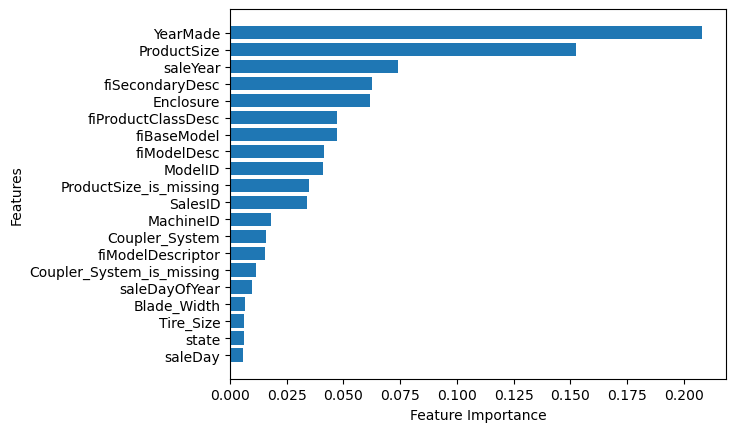

In [88]:
# Helper Function

def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({'features':columns,
                      'feature_importances':importances})
        .sort_values('feature_importances',ascending=False)
        .reset_index(drop=True)) # reset index to start from 0
    
    # plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

plot_features(coloums,ideal_model.feature_importances_)



,feaure_importance,feaure
SalesID,0.033945,0.033945
MachineID,0.018115,0.018115
ModelID,0.040917,0.040917
datasource,0.001708,0.001708
auctioneerID,0.003408,0.003408
...,...,...
Backhoe_Mounting_is_missing,0.000255,0.000255
Blade_Type_is_missing,0.000167,0.000167
Travel_Controls_is_missing,0.000210,0.000210
Differential_Type_is_missing,0.000126,0.000126


In [103]:
feature_dict_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
feaure_importance,0.033945,0.018115,0.040917,0.001708,0.003408,0.208201,0.002951,0.001101,0.041612,0.047191,...,0.000292,0.000031,0.000157,0.000029,0.000038,0.000255,0.000167,0.00021,0.000126,0.000094
feaure,0.033945,0.018115,0.040917,0.001708,0.003408,0.208201,0.002951,0.001101,0.041612,0.047191,...,0.000292,0.000031,0.000157,0.000029,0.000038,0.000255,0.000167,0.00021,0.000126,0.000094
